Análisis de vacunación COVID-19 - Argentina 2021
Análisis según % de vacunados (primera y segunda dosis) sobre población de cada provincia
Análisis de cantidad de vacunados (primera y segunda dosis) para cada provincia 

In [2]:
#import librerias necesarias

import numpy as np 
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
#import io


Total Pais de vacunados:  6693438
Promedio % vacunados sobre total de habitantes:  15.0


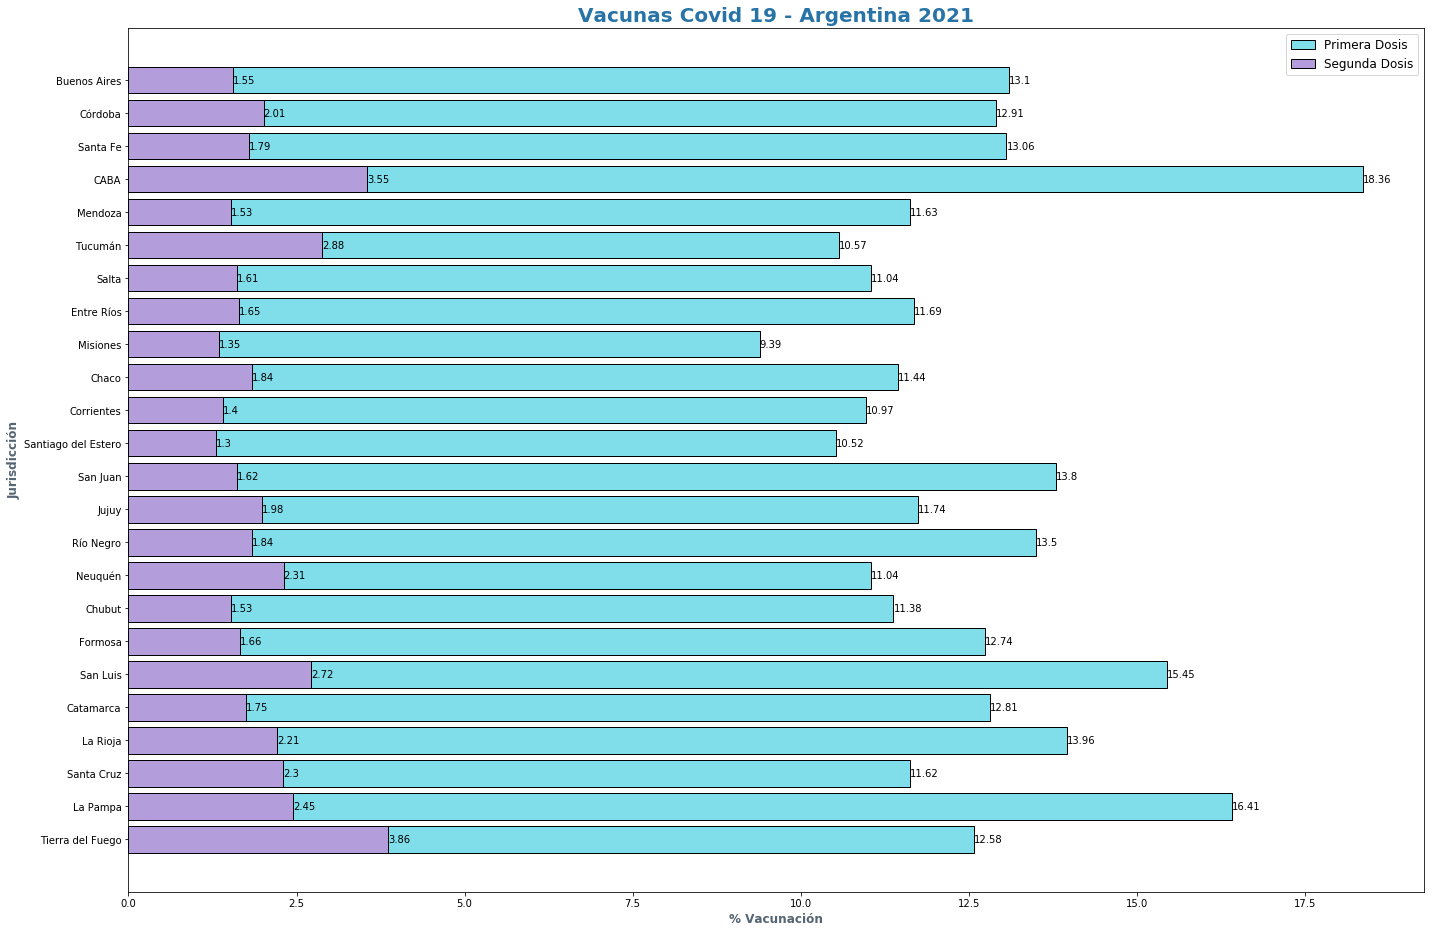

In [4]:
url="https://sisa.msal.gov.ar/datos/descargas/covid-19/files/Covid19VacunasAgrupadas.csv"
data=pd.read_csv(url,delimiter= ",")

#Imprimimos las primeras 5 filas
data.head()

#Imprimimos las ultimas 5 filas
data.tail()

#Imprimos 4 filas random
data.sample(5)

#Seleccionar columnas especificas del dataframe
data[['jurisdiccion_nombre','vacuna_nombre']].head()

#Seleccionar una columna especifica
data.vacuna_nombre

#Filtrar un valor especifico por el nombre
data[data.jurisdiccion_nombre == "CABA"]

#Cantidad total de vacunas (primera dosis) aplicadas
data[['primera_dosis_cantidad']].sum()

#Cantidad total de vacunas (segunda dosis) aplicadas
data[['segunda_dosis_cantidad']].sum()

#Cantidad total de vacunas aplicadas (primera y segunda dosis)
dosis1 = data[['primera_dosis_cantidad']].sum()
dosis2 = data[['segunda_dosis_cantidad']].sum()

total1 = int(dosis1)
total2 = int(dosis2)

total = total1+total2
habitantes = 44490000

print("Total Pais de vacunados: ", total)

#Promedio de aplicaciones de vacunas (primera y segunda dosis) sobre el total de habitantes
print("Promedio % vacunados sobre total de habitantes: ", round(total/habitantes,3) * 100)

#Agrupamos total de vacunas por jurisdiccion 
df1 = data.groupby("jurisdiccion_nombre", as_index=False).sum()

#print(df1)

#Agregamos una columna con la poblacion de cada provincia
df1new = df1.assign(poblacion=[17541141,3075646,415438,1204541,618994,1120801,3760450,1385961,605193,770881,358428,393531,1990338,1261294,664057,747610,1424397,781217,508328,365698,3536418,978313,173432,1694656]) 


#print(df1new)

#Ordenamos nuestro dataframe
df2 = df1new.sort_values(by="poblacion", ascending=True)

#df2 = df2.assign(dosis1_per = df2['primera_dosis_cantidad'].div(df2['poblacion'].values, axis=0) )

fig = plt.figure()

ax = fig.add_axes([1,1,3,3])

ax.set_title("Vacunas Covid 19 - Argentina 2021", fontweight="bold", color="#2874A6",fontsize=20)
ax.set_xlabel("% Vacunación", fontweight="bold", fontsize="large", color="#566573")
ax.set_ylabel("Jurisdicción", fontweight="bold", color = "#566573", fontsize="large")
#ax.set_xticklabels(df2.jurisdiccion_nombre, rotation=60, color="black")
#df3 = df2.set_index("jurisdiccion_nombre", inplace=True)

#Promedio de vacunados sobre total de vacunas (primera dosis)
#df2.loc[df2['jurisdiccion_nombre'] == 'CABA']

#caba = df2.at[1,'primera_dosis_cantidad']

bars1 = plt.barh(df2.jurisdiccion_nombre, ((100*df2['primera_dosis_cantidad']).div(df2['poblacion'].values, axis=0)).round(2),color="#80DEEA", edgecolor="black", label="Primera Dosis")

bars2 = plt.barh(df2.jurisdiccion_nombre, ((100*df2['segunda_dosis_cantidad']).div(df2['poblacion'].values, axis=0)).round(2),color="#B39DDB", edgecolor="black", label="Segunda Dosis")

plt.legend(fontsize="large")

for bar in bars1:
  width = bar.get_width() #Previously we got the height
  label_y_pos = bar.get_y() + bar.get_height() / 2
  ax.text(width, label_y_pos, s=f'{width}', va='center')

for bar in bars2:
  width = bar.get_width() #Previously we got the height
  label_y_pos = bar.get_y() + bar.get_height() / 2
  ax.text(width, label_y_pos, s=f'{width}', va='center')





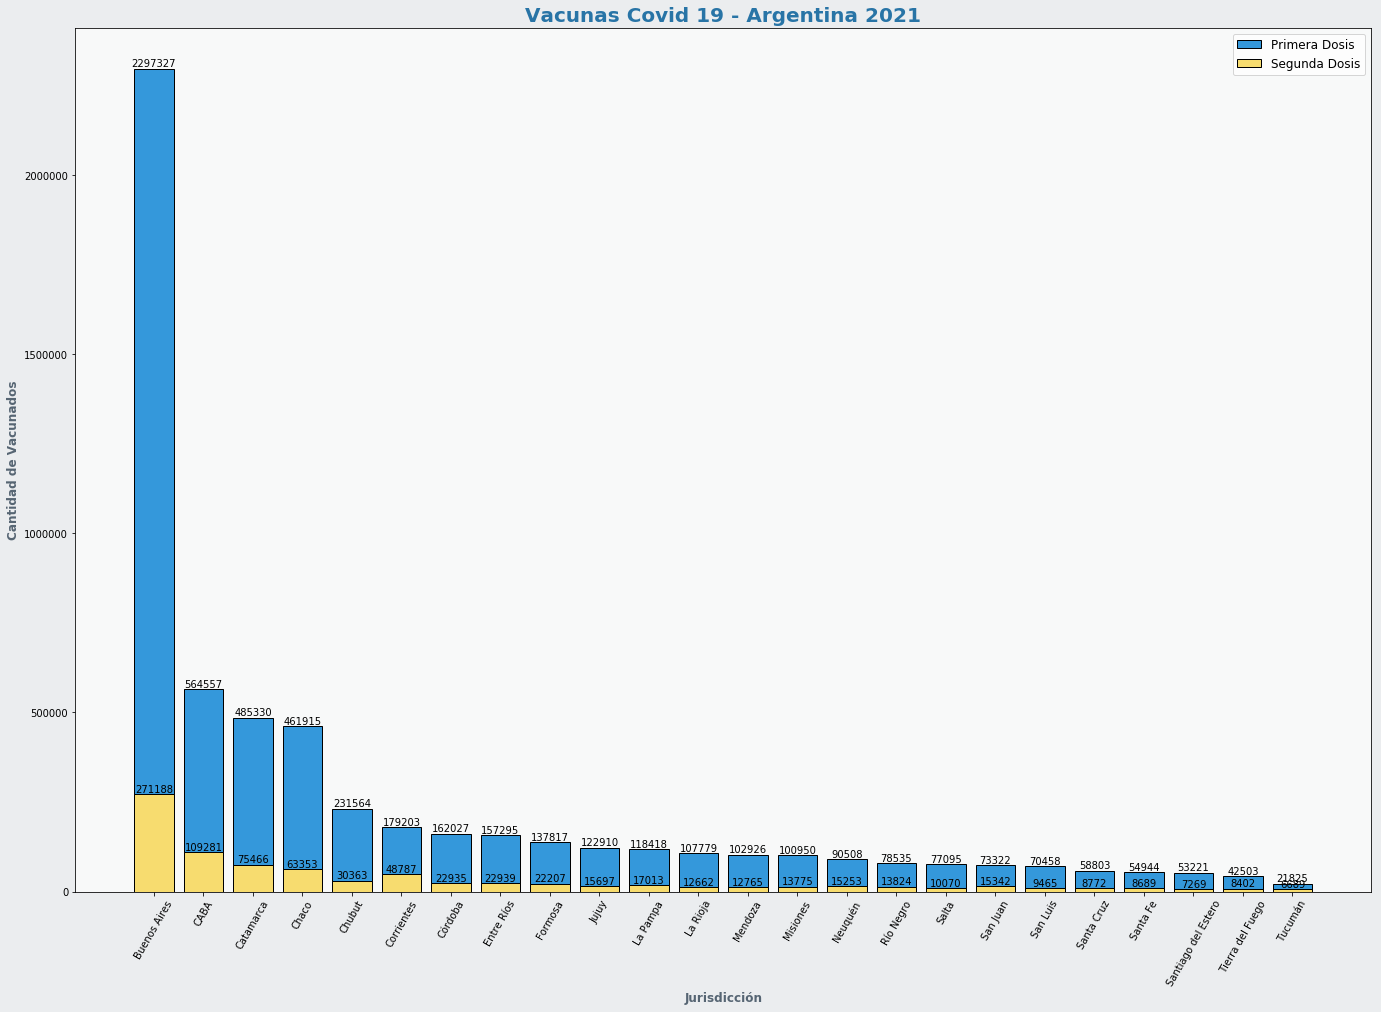

In [5]:
url="https://sisa.msal.gov.ar/datos/descargas/covid-19/files/Covid19VacunasAgrupadas.csv"
data=pd.read_csv(url, usecols=["jurisdiccion_nombre","primera_dosis_cantidad","segunda_dosis_cantidad"])

df = pd.DataFrame(data)

df1 = df.groupby("jurisdiccion_nombre", as_index=False)[['primera_dosis_cantidad','segunda_dosis_cantidad']].sum()

df1.set_index("jurisdiccion_nombre", inplace=True)

df2 = df1.sort_values(by=['primera_dosis_cantidad'], ascending=False)

fig = plt.figure()

ax = fig.add_axes([1,1,3,3])


ax.set_title("Vacunas Covid 19 - Argentina 2021", fontweight="bold", color="#2874A6",fontsize=20)
ax.set_xlabel("Jurisdicción", fontweight="bold", fontsize="large", color="#566573")
ax.set_ylabel("Cantidad de Vacunados", fontweight="bold", color = "#566573", fontsize="large")
ax.set_xticklabels(df1.index, rotation=60, color="black")

#Seteamos color gris para el background
ax.set_facecolor("#F8F9F9")

#Setea color para el grafico
fig.patch.set_facecolor("#EBEDEF")

#ploteo de bar chart (primera dosis)
bars1 = plt.bar(df2.index, df2.primera_dosis_cantidad,color="#3498DB", edgecolor="black", label="Primera Dosis")
#ploteo de bar chart (segunda dosis)
bars2 = plt.bar(df2.index, df2.segunda_dosis_cantidad, color="#F7DC6F", edgecolor="black", label="Segunda Dosis")

plt.legend(fontsize="large")

for bar in bars1:
  height = bar.get_height()
  label_x_pos = bar.get_x() + bar.get_width() / 2
  ax.text(label_x_pos, height, s=f'{height}', ha='center',
  va='bottom')

for bar in bars2:
  height = bar.get_height()
  label_x_pos = bar.get_x() + bar.get_width() / 2
  ax.text(label_x_pos, height, s=f'{height}', ha='center',
  va='bottom' )



